In [224]:
import random

def generate_set_cover_instance(universe_size, subset_count, max_subset_size):
    universe = set(range(1, universe_size + 1))
    subsets = []

    for _ in range(subset_count):
        subset_size = min(random.randint(1, min(max_subset_size, len(universe))), len(universe))
        subset = random.sample(universe, subset_size)
        subsets.append(set(subset))

    return universe, subsets

# Example usage:
universe_size = 20
subset_count = 8
max_subset_size = 5

universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

print("Universe:", universe)
print("Subsets:", subsets)


Universe: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Subsets: [{19}, {14}, {16}, {7, 12, 14, 19, 20}, {18, 13}, {1, 5, 7, 9, 20}, {16, 17, 20, 7}, {8, 2, 13, 7}]


<ipython-input-224-2f660ad2e8d7>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


In [234]:
import random

def set_cover_algo(universe, subsets):
    all_arrays = []

    while set().union(*map(set, all_arrays)) != set(universe):
        remaining_elements = set(universe) - set().union(*map(set, all_arrays))
        feasible_subsets = [s for s in subsets if any(el in remaining_elements for el in s)]

        if not feasible_subsets:
            break

        selected_subset = max(feasible_subsets, key=lambda s: sum(s) * len(set(s) - set().union(*map(set, all_arrays))))
        all_arrays.append(selected_subset)

    return all_arrays

# Example usage:
universe = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
subsets = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9, 10}]

result = set_cover_algo(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [{8, 9, 10, 7}, {4, 5, 6}, {1, 2, 3}]


In [235]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    selected_subsets = []
    iteration = 0
    total_len = len(elements)
    count = 0
    while elements:
      if count > 10:
        break
      # Choose the subset that covers the maximum number of uncovered elements
      best_subset = max(subsets, key=lambda s: len(set(s) & elements))

      # Add the chosen subset to the selected subsets
      selected_subsets.append(best_subset)

      # Update the set of uncovered elements
      elements -= set(best_subset)

      if len(elements) >= total_len:
        count += 1
      else:
        total_len = len(elements)

    return selected_subsets

# Example usage:
universe = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
subsets = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9, 10}]

result = set_cover_greedy(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [{8, 9, 10, 7}, {1, 2, 3}, {4, 5, 6}]


In [236]:
def set_cover_approx(universe, subsets):
    all_arrays = set_cover_greedy(universe, subsets)
    flattened_list = [item for sublist in all_arrays for item in sublist]

    while set(flattened_list) != set(universe):
        remaining_elements = set(universe) - set(flattened_list)
        feasible_subsets = [s for s in subsets if any(el in remaining_elements for el in s)]

        if not feasible_subsets:
            break

        selected_subset = max(feasible_subsets, key=lambda s: len(set(s) & remaining_elements))
        all_arrays.append(selected_subset)
        flattened_list = [item for sublist in all_arrays for item in sublist]

    return all_arrays

In [238]:
# Example usage:
universe_size = 15
subset_count = 1000
max_subset_size = 10

universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

result = set_cover_algo(universe, subsets)
print("Sorted Subsets:", result)

result2 = set_cover_greedy(universe, subsets)
print("Sorted Subsets:", result2)


Sorted Subsets: [{1, 3, 7, 8, 10, 11, 12, 13, 14, 15}, {2, 4, 5, 6, 8, 9, 11, 12, 13, 14}]
Sorted Subsets: [{3, 4, 5, 6, 7, 9, 10, 11, 14, 15}, {1, 2, 3, 5, 8, 10, 12, 13, 15}]


<ipython-input-224-2f660ad2e8d7>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


In [254]:
import time
import matplotlib.pyplot as plt
import numpy as np

sizes = []
greedy_algo_times = []
max_algo_times = []
approx_times = []
results_greedy = []
results_max_algo = []
results_approx_ = []
for _ in range(2,100):
    # Example usage:
    universe_size = random.randint(10,1000)
    subset_count = random.randint(10,30)
    max_subset_size = random.randint(2,30)



    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)
    evalVal = [item for sublist in subsets for item in sublist]

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = set_cover_algo(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = set_cover_approx(universe, subsets)
    approx_time = time.time() - start_time

    print(len(result1),len(result2),len(result3),len(subsets))
    results_greedy.append(len(result1))
    results_max_algo.append(len(result2))
    results_approx_.append(len(result3))
    set_values = [set(subset) for subset in result1]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result2]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result3]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    max_algo_times.append(maxVal_time)
    approx_times.append(approx_time)


<ipython-input-224-2f660ad2e8d7>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


35 24 35 26
1.0
1.0
1.0
37 26 37 29
1.0
1.0
1.0
35 24 35 25
1.0
1.0
1.0
27 16 27 19
1.0
1.0
1.0
33 22 33 28
1.0
1.0
1.0
24 13 24 13
1.0
1.0
1.0
38 27 38 29
1.0
1.0
1.0
37 26 37 29
1.0
1.0
1.0
28 17 28 17
1.0
1.0
1.0
36 25 36 26
1.0
1.0
1.0
25 14 25 15
1.0
1.0
1.0
31 20 31 22
1.0
1.0
1.0
31 20 31 21
1.0
1.0
1.0
24 13 24 13
1.0
1.0
1.0
28 17 28 17
1.0
1.0
1.0
22 11 22 11
1.0
1.0
1.0
26 15 26 16
1.0
1.0
1.0
27 16 27 16
1.0
1.0
1.0
24 13 24 13
1.0
1.0
1.0
39 28 39 28
1.0
1.0
1.0
35 24 35 25
1.0
1.0
1.0
26 15 26 15
1.0
1.0
1.0
20 9 20 20
1.0
1.0
1.0
27 16 27 16
1.0
1.0
1.0
2 2 2 11
1.0
1.0
1.0
40 29 40 30
1.0
1.0
1.0
37 26 37 26
1.0
1.0
1.0
24 13 24 20
1.0
1.0
1.0
27 16 27 16
1.0
1.0
1.0
25 14 25 14
1.0
1.0
1.0
25 14 25 15
1.0
1.0
1.0
25 14 25 14
1.0
1.0
1.0
29 18 29 19
1.0
1.0
1.0
37 26 37 27
1.0
1.0
1.0
36 25 36 25
1.0
1.0
1.0
11 10 11 30
1.0
1.0
1.0
23 12 23 12
1.0
1.0
1.0
8 8 8 27
1.0
1.0
1.0
20 9 20 12
1.0
1.0
1.0
30 19 30 19
1.0
1.0
1.0
37 26 37 26
1.0
1.0
1.0
27 16 27 16
1.0
1.0
1.0


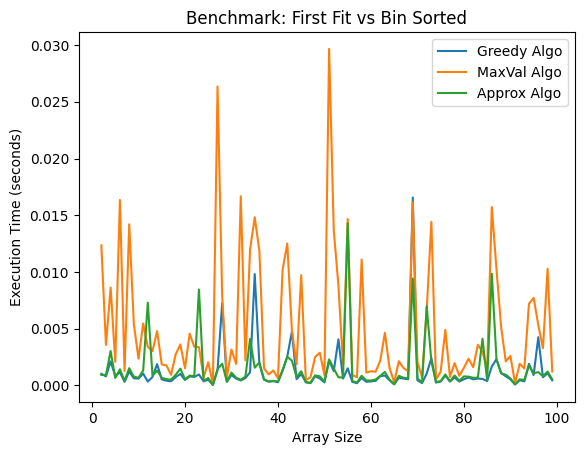

In [255]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_times, label='Greedy Algo')
plt.plot(sizes, max_algo_times, label='MaxVal Algo')
plt.plot(sizes, approx_times, label='Approx Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

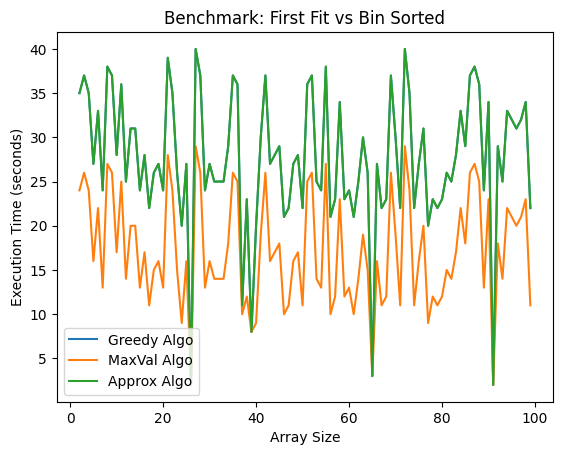

In [256]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, results_greedy, label='Greedy Algo')
plt.plot(sizes, results_max_algo, label='MaxVal Algo')
plt.plot(sizes, results_approx_, label='Approx Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()